## All the Lifecycle In A Data Science Projects

In [1]:
## Data Analysis Phase
## MAin aim is to understand more about the data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)


In [2]:
df=pd.read_csv('cardio_train.csv')


### Overview of the Data

In [3]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [4]:
df.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69296,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69297,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69298,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69299,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69300,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


#### In Data Analysis We will Analyze To Find out the below stuff

-Missing Values
-All The Numerical Variables
-Distribution of the Numerical Variables
-Categorical Variables
-Cardinality of Categorical Variables
-Outliers
-Relationship between independent and dependent feature cardio

In [5]:
df.shape

(69301, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 13 columns):
id             69301 non-null int64
age            69301 non-null int64
gender         69301 non-null int64
height         69301 non-null int64
weight         69301 non-null float64
ap_hi          69301 non-null int64
ap_lo          69301 non-null int64
cholesterol    69301 non-null int64
gluc           69301 non-null int64
smoke          69301 non-null int64
alco           69301 non-null int64
active         69301 non-null int64
cardio         69301 non-null int64
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [7]:
df.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [8]:
df.var()

id             8.158507e+08
age            6.087381e+06
gender         2.273587e-01
height         6.732756e+01
weight         2.068842e+02
ap_hi          2.395555e+04
ap_lo          3.575739e+04
cholesterol    4.627677e-01
gluc           3.274656e-01
smoke          8.029891e-02
alco           5.097848e-02
active         1.575951e-01
cardio         2.500034e-01
dtype: float64

In [9]:
df.skew()

id             -0.001317
age            -0.307388
gender          0.631203
height         -0.634040
weight          1.005120
ap_hi          84.886144
ap_lo          32.101546
cholesterol     1.587480
gluc            2.397520
smoke           2.907579
alco            3.951845
active         -1.531525
cardio          0.001645
dtype: float64

In [10]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [11]:
df.isnull().values.any()

False

In [12]:
#percentage of missing values in each variables
df.isnull().sum()/len(df)*100

id             0.0
age            0.0
gender         0.0
height         0.0
weight         0.0
ap_hi          0.0
ap_lo          0.0
cholesterol    0.0
gluc           0.0
smoke          0.0
alco           0.0
active         0.0
cardio         0.0
dtype: float64

### Observation(s):

it is clearly visible there is no null value values present in dataset

In [13]:
print("There is {} duplicated values in data frame".format(df.duplicated().sum()))

There is 0 duplicated values in data frame


In [14]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,28563.100347,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,988.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25745.000000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50494.000000,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75150.000000,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
import pandas_profiling as pp
pp.ProfileReport(df)

## Missing values

In [16]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')

### Observation(s)

 After creation of this it is clearly seen that there is no missing values

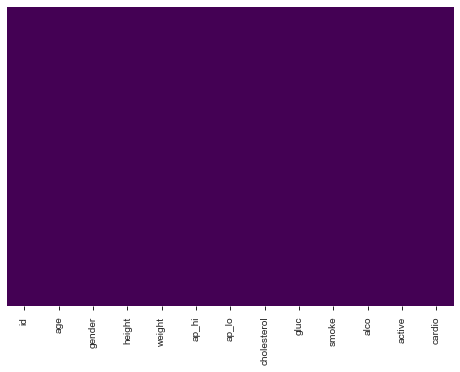

In [17]:
#check the missinh value with the seaborn visualization
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Observation(s):

After seen this seaborn visualization its clearly visible that there is no missing value

## Numerical Variables

In [18]:
#list of numerical variables
numerical_features=[feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical variables:', len(numerical_features))

#visible the numercial variables
df[numerical_features].head()

Number of numerical variables: 13


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


## Observation(s):

from the dataset all the features and targets are int and flot not a objects

In [19]:
##Numerical variables are usually of 2 types
## 1.Continous variable and Discrete variables
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 7


In [20]:
discrete_feature

['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']

In [21]:
df[discrete_feature].head()

,gender,cholesterol,gluc,smoke,alco,active,cardio
0,1,2,2,0,0,1,0
1,1,1,1,0,0,1,1
2,1,1,1,0,0,1,0
3,2,1,1,1,1,1,0
4,1,1,1,0,0,1,0


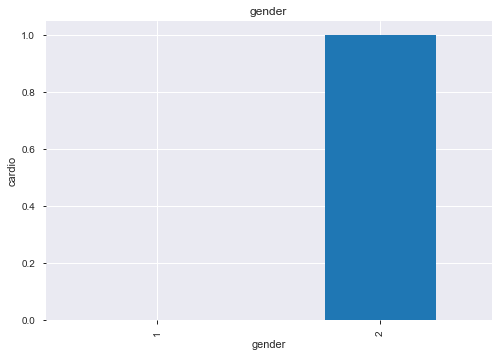

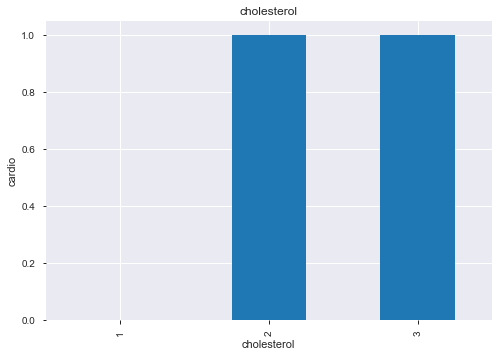

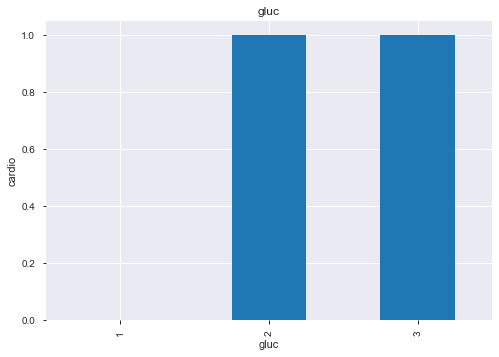

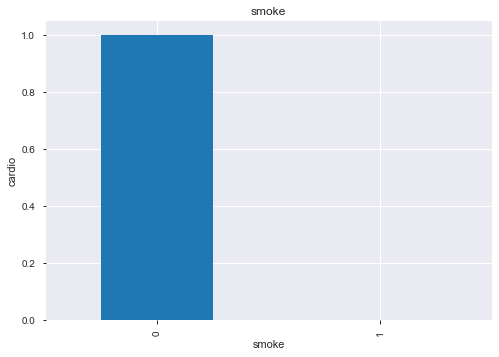

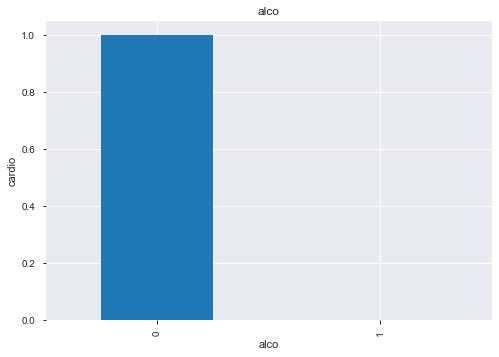

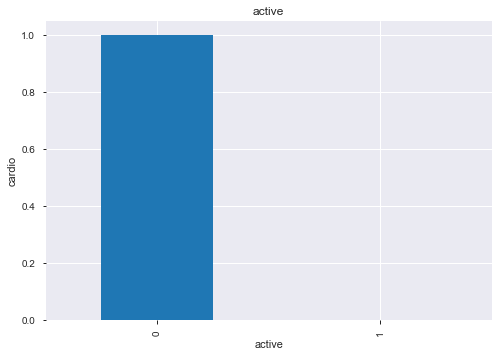

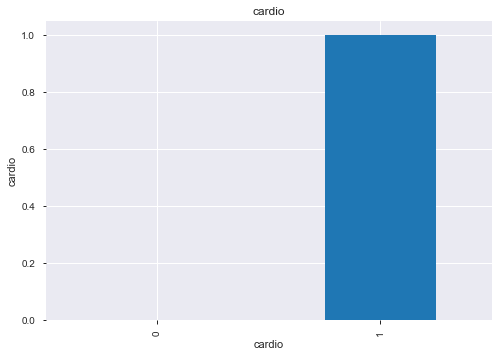

In [22]:
## Lets find the relationship between them and Win(w)

for feature in discrete_feature:
    data=df.copy()
    data.groupby(feature)['cardio'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('cardio')
    plt.title(feature)
    plt.show()

### Continuous Variable

In [23]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]

print("Continuous Variables: {}".format(len(continuous_feature)))

Continuous Variables: 6


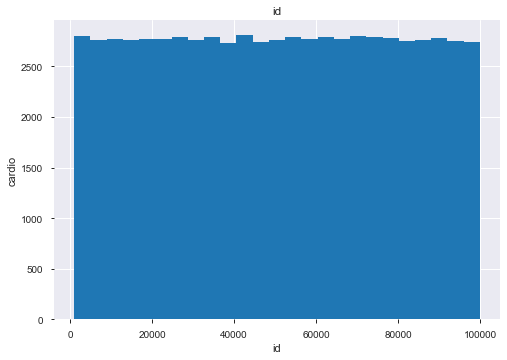

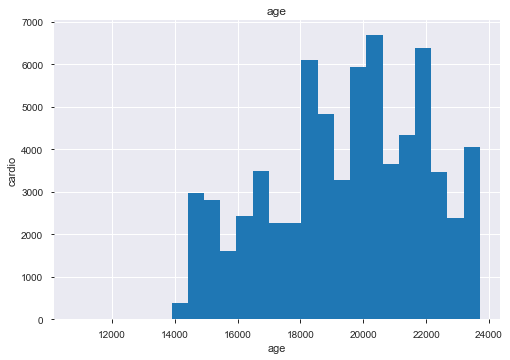

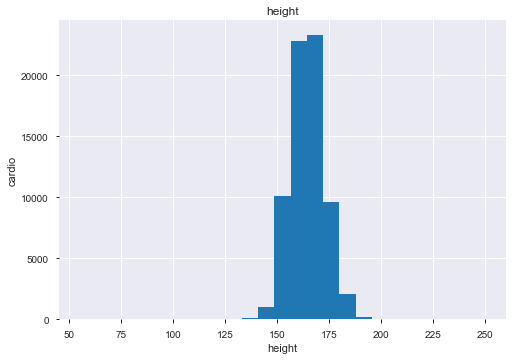

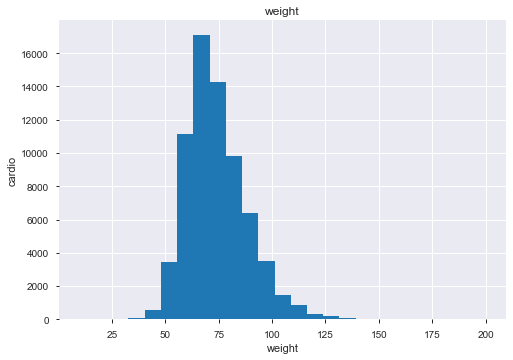

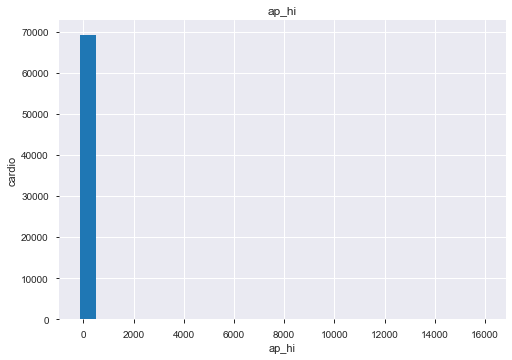

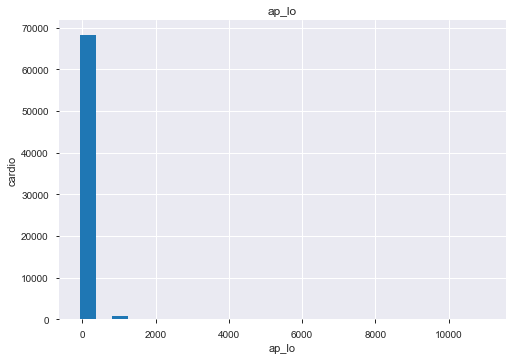

In [24]:
## Lets analysis the continuous values by creating histogram to understand the distribution
for feature in continuous_feature:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('cardio')
    plt.title(feature)
    plt.show();

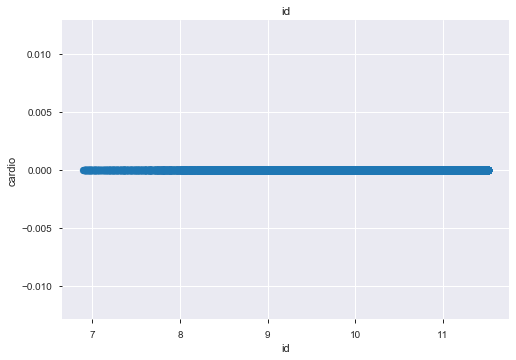

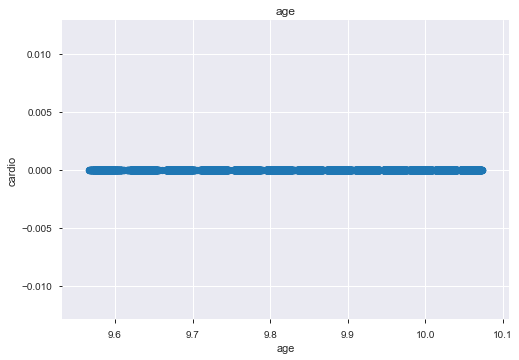

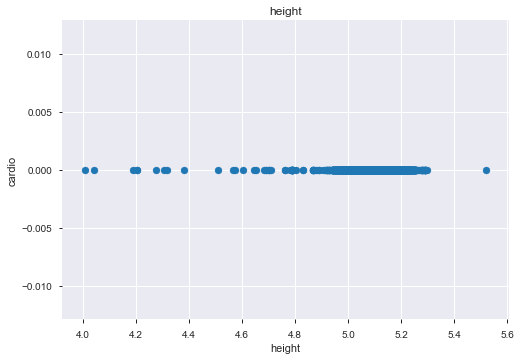

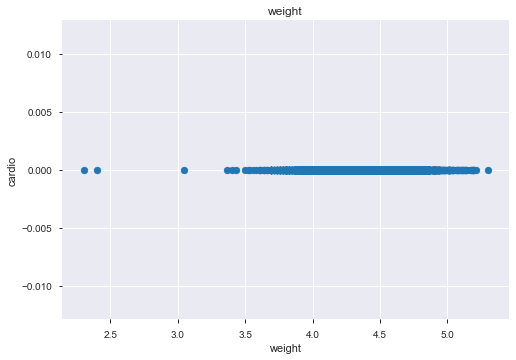

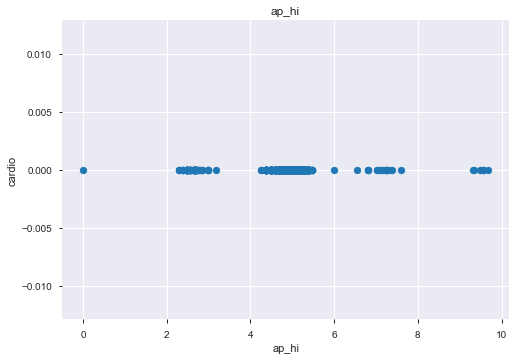

In [25]:
## we will be using logrithmic transfromation


for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['cardio']=np.log(data['cardio'])
        plt.scatter(data[feature],data['cardio'])
        plt.xlabel(feature)
        plt.ylabel('cardio')
        plt.title(feature)
        plt.show()
    

### Checking Duplication and Missing Values

## Outliers

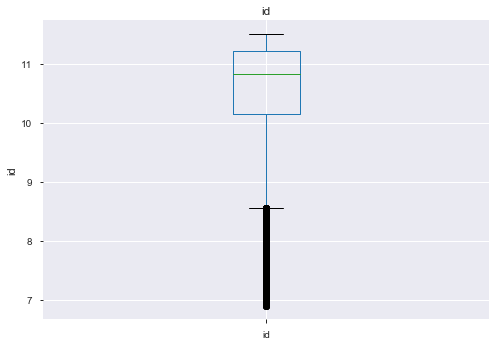

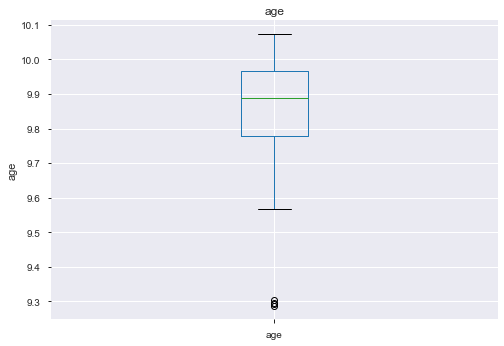

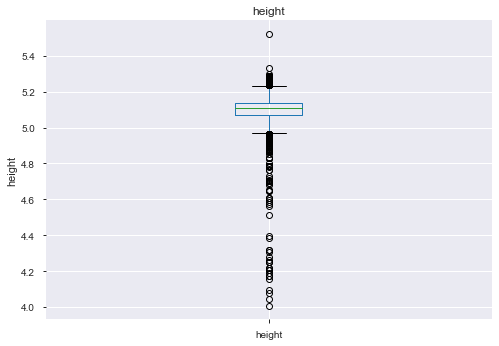

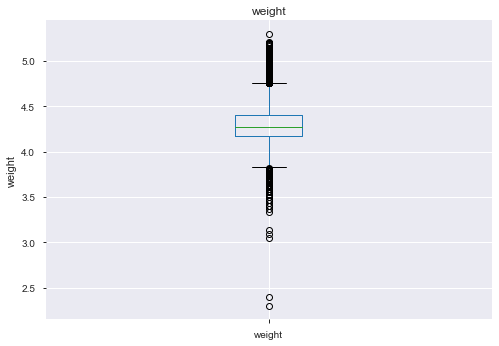

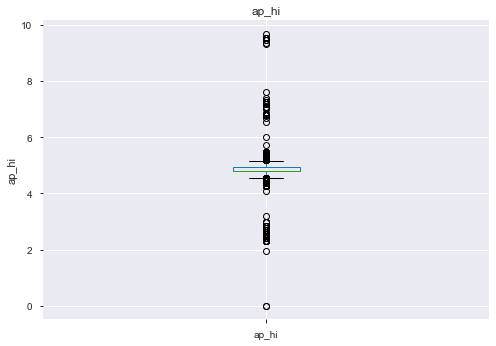

In [26]:
for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

### Categorical Variables

In [27]:
categorical_features=[feature for feature in df.columns if data[feature].dtypes=='O']
categorical_features

[]

### Observation(s):

from the dataset after creating a categorical variables its show a empty

### Feature Engineering

#### Gaussian Distributed

Text(0, 0.5, 'No of id')

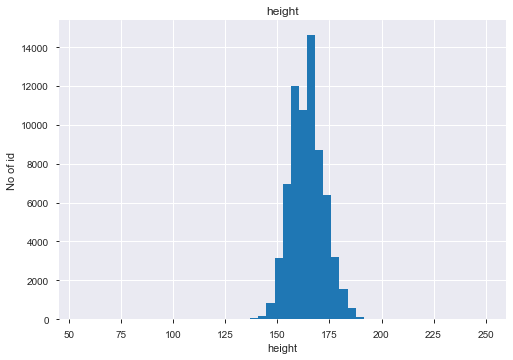

In [28]:
figure =df.height.hist(bins=50)
figure.set_title('height')
figure.set_xlabel('height')
figure.set_ylabel("No of id")

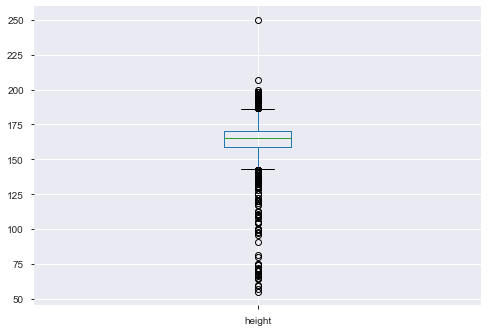

In [29]:
figure=df.boxplot(column='height')

In [30]:
df['height'].describe()

count    69301.000000
mean       164.362217
std          8.205337
min         55.000000
25%        159.000000
50%        165.000000
75%        170.000000
max        250.000000
Name: height, dtype: float64

In [31]:
##### Assuming Height follows A Gaussian Distribution we will calculate the boundaries which differentiates the outliers

uppper_boundary=df['height'].mean() + 3* df['height'].std()
lower_boundary=df['height'].mean() - 3* df['height'].std()
print(lower_boundary), print(uppper_boundary),print(df['height'].mean())

139.7462058692552
188.9782281215963
164.36221699542574


(None, None, None)

In [32]:
#### Assuming weights= follows A Gaussian Distribution we will calculate the boundary which differentaiates the outliers
upper_boundary=df['weight'].mean() + 3*df['weight'].std()
lower_boundary=df['weight'].mean() - 3*df['weight'].std()
print(lower_boundary), print(upper_boundary),print(df['weight'].mean())

31.052620552705385
117.35343419397941
74.2030273733424


(None, None, None)

In [33]:
df.loc[df['height']>=188,'height']=188

Text(0, 0.5, 'No of id')

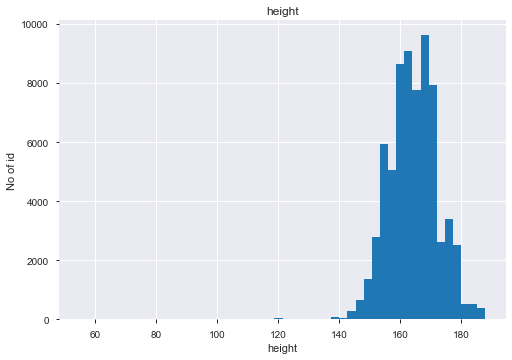

In [34]:
figure =df.height.hist(bins=50)
figure.set_title('height')
figure.set_xlabel('height')
figure.set_ylabel("No of id")

In [35]:
df.loc[df['weight']>=117,'weight']=117

Text(0, 0.5, 'no. of person')

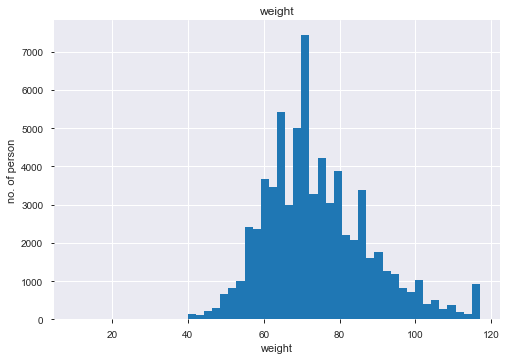

In [36]:
fig=df.weight.hist(bins=50)
fig.set_title('weight')
fig.set_xlabel('weight')
fig.set_ylabel('no. of person')

### Deal with Skewed feature 

Text(0, 0.5, 'No. of Person')

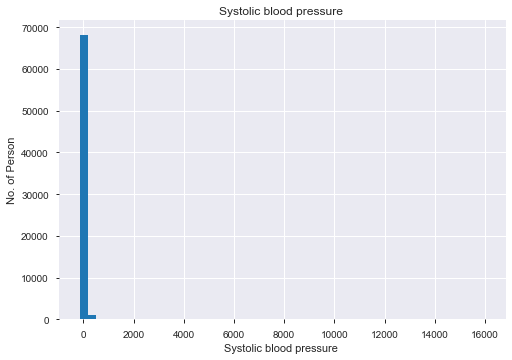

In [37]:
figure=df.ap_hi.hist(bins=50)
figure.set_title('Systolic blood pressure ')
figure.set_xlabel('Systolic blood pressure ')
figure.set_ylabel('No. of Person')

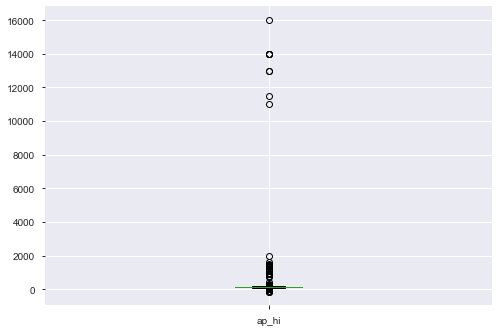

In [38]:
df.boxplot(column='ap_hi')

In [39]:
df['ap_hi'].describe()

count    69301.000000
mean       128.829584
std        154.775805
min       -150.000000
25%        120.000000
50%        120.000000
75%        140.000000
max      16020.000000
Name: ap_hi, dtype: float64

In [40]:
#### Lets compute the Interqantile range to calculate the boundaries
IQR=df.ap_hi.quantile(0.75)-df.ap_hi.quantile(0.25)

In [41]:
IQR

20.0

In [42]:
#### Extreme outliers
lower_bridge=df['ap_hi'].quantile(0.25)-(IQR*3)
upper_bridge=df['ap_hi'].quantile(0.75)-(IQR*3)
print(lower_bridge), print(upper_bridge)

60.0
80.0


(None, None)

Text(0, 0.5, 'No. of Person')

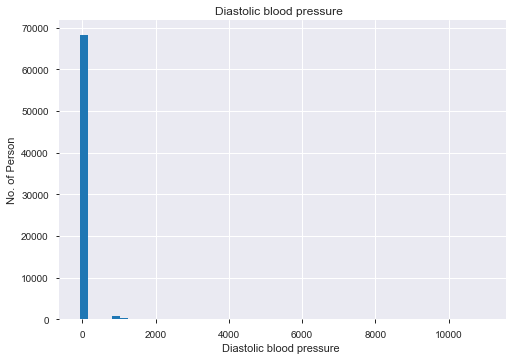

In [43]:
figure=df.ap_lo.hist(bins=50)
figure.set_title('Diastolic blood pressure  ')
figure.set_xlabel('Diastolic blood pressure ')
figure.set_ylabel('No. of Person')

In [44]:
df['ap_lo'].describe()

count    69301.000000
mean        96.650092
std        189.096240
min        -70.000000
25%         80.000000
50%         80.000000
75%         90.000000
max      11000.000000
Name: ap_lo, dtype: float64

In [45]:
#### lets compute the Interquantile range to calculate the boundaries
IQR=df['ap_lo'].quantile(0.75)-df['ap_lo'].quantile(0.25)

In [46]:
IQR

10.0

In [47]:
#### Extreme outliers
lower_bridge=df['ap_lo'].quantile(0.25)-(IQR*3)
upper_bridge=df['ap_lo'].quantile(0.75)-(IQR*3)
print(lower_bridge), print(upper_bridge)

50.0
60.0


(None, None)

In [48]:
df.loc[df['ap_hi']>=80,'ap_hi']=80

In [49]:
df.loc[df['ap_lo']>=60,'ap_lo']=60

Text(0, 0.5, 'No. of Person')

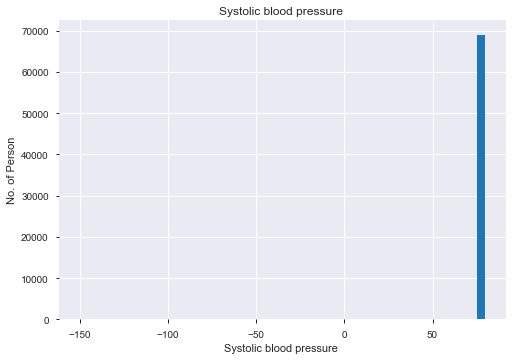

In [50]:
figure=df.ap_hi.hist(bins=50)
figure.set_title('Systolic blood pressure ')
figure.set_xlabel('Systolic blood pressure ')
figure.set_ylabel('No. of Person')

Text(0, 0.5, 'No. of Person')

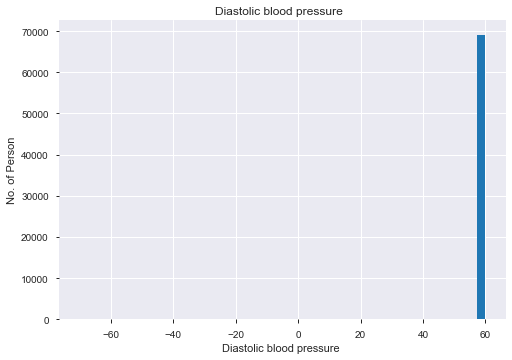

In [51]:
figure=df.ap_lo.hist(bins=50)
figure.set_title('Diastolic blood pressure  ')
figure.set_xlabel('Diastolic blood pressure ')
figure.set_ylabel('No. of Person')

## Feature Scaling

In [52]:
feature_scale=[feature for feature in df.columns if feature not in ['cardio']] 
from sklearn.preprocessing import StandardScaler

In [53]:
scaler=StandardScaler()
scaler.fit(df[feature_scale])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [54]:
scaler.transform(df[feature_scale])


array([[-1.73243929,  1.21601824, -0.73302344, ..., -0.31072844,
        -0.23864069,  0.49376463],
       [-1.73240428, -1.95391548, -0.73302344, ..., -0.31072844,
        -0.23864069,  0.49376463],
       [-1.73236927,  0.98580185, -0.73302344, ..., -0.31072844,
        -0.23864069,  0.49376463],
       ...,
       [ 1.7338761 , -0.16325352,  1.36421285, ..., -0.31072844,
         4.19040018, -2.02525646],
       [ 1.73394612,  1.20061644, -0.73302344, ..., -0.31072844,
        -0.23864069, -2.02525646],
       [ 1.73398113,  0.43417421, -0.73302344, ..., -0.31072844,
        -0.23864069,  0.49376463]])

In [55]:
data=pd.DataFrame(scaler.transform(df[feature_scale]),columns=feature_scale)

In [56]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,-1.732439,1.216018,-0.733023,-1.144347,-0.365755,0.049667,0.036033,0.930805,1.351794,-0.310728,-0.238641,0.493765
1,-1.732404,-1.953915,-0.733023,-0.165599,-0.221657,0.049667,0.036033,-0.539210,-0.395719,-0.310728,-0.238641,0.493765
2,-1.732369,0.985802,-0.733023,0.079088,-0.293706,0.049667,0.036033,-0.539210,-0.395719,-0.310728,-0.238641,0.493765
3,-1.732334,-1.994041,1.364213,0.079088,0.787028,0.049667,0.036033,-0.539210,-0.395719,3.218244,4.190400,0.493765
4,-1.732299,1.590525,-0.733023,-1.144347,-0.870097,0.049667,0.036033,-0.539210,-0.395719,-0.310728,-0.238641,0.493765


In [57]:
X=data.iloc[:,1:-1]
y=df['cardio']

In [58]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [59]:
print(model.feature_importances_)

[0.47522564 0.00531213 0.23859201 0.21587193 0.00141114 0.00143578
 0.04367828 0.01065651 0.0034126  0.00440398]


In [60]:
from sklearn.decomposition import PCA

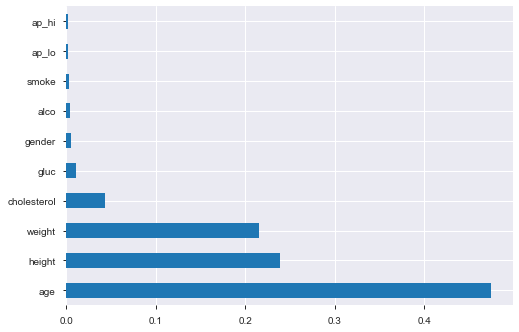

In [61]:
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(10).plot(kind='barh')
plt.show()

In [62]:
X=X.drop(['ap_lo','ap_hi','alco','gender','smoke','gluc'],axis=1)

In [63]:
X.head()

,age,height,weight,cholesterol
0,1.216018,-1.144347,-0.365755,0.930805
1,-1.953915,-0.165599,-0.221657,-0.539210
2,0.985802,0.079088,-0.293706,-0.539210
3,-1.994041,0.079088,0.787028,-0.539210
4,1.590525,-1.144347,-0.870097,-0.539210


In [64]:
y.head()

0    0
1    1
2    0
3    0
4    0
Name: cardio, dtype: int64

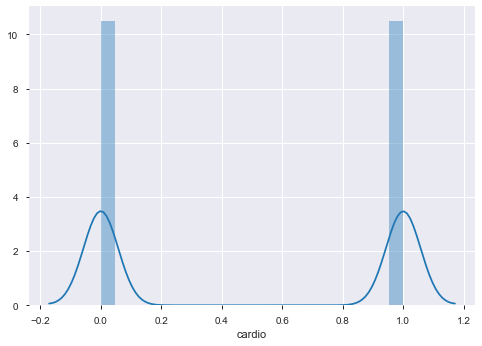

In [65]:
sns.distplot(y)

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings("ignore")

In [67]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=38,test_size=0.20)

In [68]:

dec = DecisionTreeClassifier()
ran = RandomForestClassifier(n_estimators=100)
knn = KNeighborsClassifier(n_neighbors=100)
svm = SVC(random_state=1)
naive = GaussianNB()

In [69]:
models = {"Decision tree" : dec,
          "Random forest" : ran,
          "KNN" : knn,
          "SVM" : svm,
          "Naive bayes" : naive}
scores= { }

for key, value in models.items():    
    model = value
    model.fit(X_train, y_train)
    scores[key] = model.score(X_test, y_test)

In [70]:
scores_frame = pd.DataFrame(scores, index=["Accuracy Score"]).T
scores_frame.sort_values(by=["Accuracy Score"], axis=0 ,ascending=False, inplace=True)
scores_frame

,Accuracy Score
SVM,0.642811
KNN,0.637400
Naive bayes,0.625424
Random forest,0.591299
Decision tree,0.559195


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

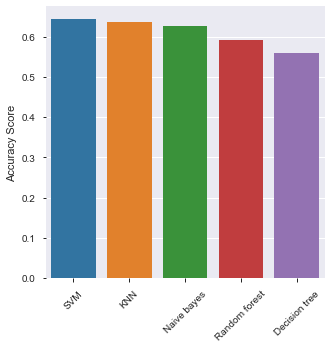

In [71]:
plt.figure(figsize=(5,5))
sns.barplot(x=scores_frame.index,y=scores_frame["Accuracy Score"])
plt.xticks(rotation=45)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'SVM' : {
            'model': SVC(),
            'params': {
                'C': [6,7,8,9,10,11,12], 
                'kernel': ['linear','rbf']
            
            }
        },
        'KNN': {
            'model': KNeighborsClassifier(),
            'params': {
                'n_neighbors':[5,6,7,8,9,10],
                 'leaf_size':[1,2,3,5],
                 'weights':['uniform', 'distance'],
                 'algorithm':['auto', 'ball_tree','kd_tree','brute'],
                  'n_jobs':[-1]
            }
        },
        'decision_tree': {
            'model': DecisionTreeClassifier(),
            'params': {
                    'max_features': ['auto', 'sqrt', 'log2'],
                     'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
                    'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
                    'random_state':[123]
    
                
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)